<a href="https://colab.research.google.com/github/Yen-Nhi-23/TTNT/blob/main/Thuat%20toan%20to%20mau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Tạo ma trận kề của đồ thị 6 đỉnh
G = [[0, 1, 1, 0, 1, 0],
     [1, 0, 1, 1, 0, 1],
     [1, 1, 0, 1, 1, 0],
     [0, 1, 1, 0, 0, 1],
     [1, 0, 1, 0, 0, 1],
     [0, 1, 0, 1, 1, 0]
  ]

# Tên các đỉnh của đồ thị
node = "ABCDEF"
t_ = {}
for i in range(len(G)):
    t_[node[i]] = i # Gán A = 0, B = 1, ... F = 5

# Bậc của các đỉnh
degree = []
for i in range(len(G)):
    degree.append(sum(G[i]))

# Màu có thể sử dụng để tô cho các đỉnh
colorDict = {}
for i in range(len(G)):
    colorDict[node[i]] = ["Blue", "Red", "Yellow", "Green"]

# Sắp xếp các đỉnh theo thứ tự bậc (Selection Sort)
sortedNode = []
indeks = []

for i in range(len(degree)):
    _max = -1
    idx = -1
    for j in range(len(degree)):
        if j not in indeks:
            if degree[j] > _max:
                _max = degree[j]
                idx = j
    if idx != -1:
        indeks.append(idx)
        sortedNode.append(node[idx])

# Phần xử lý tô màu sử dụng ít màu nhất
theSolution = {}
for n in sortedNode:
    setTheColor = colorDict[n]

    # Gán màu đầu tiên khả dụng cho đỉnh n
    theSolution[n] = setTheColor[0]

    adjacentNode = G[t_[n]]
    for j in range(len(adjacentNode)):
      if adjacentNode[j] == 1 and (setTheColor[0] in colorDict[node[j]]):
        # Xóa màu đó khỏi danh sách chọn của đỉnh kề (Cấm tô màu này)
        colorDict[node[j]].remove(setTheColor[0])

# In kết quả từng đỉnh và màu đã tô tương ứng
for t, w in sorted(theSolution.items()):
  print("Đỉnh ", t, " = ", w)

Đỉnh  A  =  Yellow
Đỉnh  B  =  Blue
Đỉnh  C  =  Red
Đỉnh  D  =  Yellow
Đỉnh  E  =  Blue
Đỉnh  F  =  Red


In [ ]:
import sys

def read_adjacency_matrix(filename):
  matrix = []
  try:
    with open(filename, 'r') as f:
      for line in f:
        parts = line.strip().split()
        if not parts: continue

        row = [int(x) for x in parts]
        matrix.append(row)
    return matrix
  except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file '{filename}'")
    sys.exit()
  except ValueError:
    print("Lỗi: File chứa ký tự không hợp lệ (phải là số nguyên).")
    sys.exit()

# --- BƯỚC 1: Đọc dữ liệu từ file ---
filename = 'graph.txt'
G = read_adjacency_matrix(filename)
num_vertices = len(G)


# --- BƯỚC 2: Tự động sinh tên đỉnh (A, B, C...) ---
if num_vertices <= 26:
  node = [chr(65 + i) for i in range(num_vertices)] # A, B, C...
else:
  node = [f"V{i}" for i in range(num_vertices)]

# Tạo dict ánh xạ tên đỉnh sang index
t_ = {name: i for i, name in enumerate(node)}

# --- BƯỚC 3: Tính bậc (Degree) ---
degree = []
for i in range(len(G)):
  degree.append(sum(G[i]))

# --- BƯỚC 4: Chuẩn bị kho màu ---
base_colors = ["Blue", "Red", "Yellow", "Green", "Purple", "Orange", "Pink", "Brown", "Cyan", "Magenta"]
colorDict = {}
for i in range(len(G)):
  colorDict[node[i]] = base_colors.copy()

# --- BƯỚC 5: Sắp xếp đỉnh theo bậc (Selection Sort) ---
sortedNode = []
indeks = []

for i in range(len(degree)):
  _max = -1
  idx = -1
  for j in range(len(degree)):
    if j not in indeks:
        if degree[j] > _max:
            _max = degree[j]
            idx = j
  if idx != -1:
      indeks.append(idx)
      sortedNode.append(node[idx])

# --- BƯỚC 6: Thuật toán tô màu (Greedy + Constraint Propagation) ---
theSolution = {}

for n in sortedNode:
  available_colors = colorDict[n]

  if not available_colors:
    print(f"Cảnh báo: Không đủ màu để tô cho đỉnh {n}!")
    theSolution[n] = "No_Color"
    continue

  # 1. Chọn màu đầu tiên khả dụng
  chosen_color = available_colors[0]
  theSolution[n] = chosen_color

  # 2. Lan truyền ràng buộc: Cấm hàng xóm dùng màu này
  u_idx = t_[n] # Lấy index của đỉnh hiện tại trong ma trận
  adjacent_row = G[u_idx] # Lấy dòng tương ứng trong ma trận

  for v_idx in range(len(adjacent_row)):
    # Nếu là hàng xóm (có nối = 1)
    if adjacent_row[v_idx] == 1:
      neighbor_name = node[v_idx]
      # Nếu màu vừa chọn vẫn còn trong list của hàng xóm -> Xóa nó đi
      if chosen_color in colorDict[neighbor_name]:
        colorDict[neighbor_name].remove(chosen_color)

# --- BƯỚC 7: In kết quả ---
print("\n--- KẾT QUẢ TÔ MÀU ---")
for t, w in sorted(theSolution.items()):
  print(f"Đỉnh {t} : {w}")

In [9]:
# Bài 3
graph = [
  [0,  10, 15, 20],  # Từ A đi các nơi
  [10, 0,  35, 25],  # Từ B đi các nơi
  [15, 35, 0,  30],  # Từ C đi các nơi
  [20, 25, 30, 0]    # Từ D đi các nơi
]

# Tên các thành phố
cities = ["A", "B", "C", "D"]
num_cities = len(graph)

# Các biến lưu kết quả
min_cost = float('inf') # Khởi tạo chi phí nhỏ nhất là Vô cực
best_path = []          # Lưu hành trình tốt nhất


# Mảng đánh dấu các thành phố đã đi (False = chưa đi)
visited = [False] * num_cities

def tsp_backtracking(curr_idx, count, current_cost, path):
  """
  curr_idx: Chỉ số thành phố đang đứng
  count: Số lượng thành phố đã đi qua
  current_cost: Tổng chi phí tạm tính
  path: Danh sách tên các thành phố đã đi
  """
  global min_cost, best_path

  #  Nếu chi phí đang đi đã lớn hơn kỷ lục cũ -> Dừng luôn
  if current_cost >= min_cost:
    return

  #  Nếu đã đi qua đủ tất cả các thành phố
  if count == num_cities:
      # Kiểm tra xem có đường từ thành phố cuối cùng quay về nơi xuất phát  không
      cost_back_to_start = graph[curr_idx][0]

      if cost_back_to_start > 0:
          total_cost = current_cost + cost_back_to_start

          # Nếu tìm được giá rẻ hơn kỷ lục cũ -> Cập nhật
          if total_cost < min_cost:
              min_cost = total_cost
              best_path = path + [cities[0]] # Cộng thêm điểm về đích vào hành trình
      return

  # [Đệ quy] Duyệt qua các thành phố khác để đi tiếp
  for next_idx in range(num_cities):
      # Điều kiện: Chưa thăm VÀ Có đường đi (chi phí > 0)
      if (visited[next_idx] == False) and (graph[curr_idx][next_idx] > 0):

          # 1. Đánh dấu đã đi
          visited[next_idx] = True

          # 2. Gọi đệ quy đi tiếp
          tsp_backtracking(
              next_idx,
              count + 1,
              current_cost + graph[curr_idx][next_idx],
              path + [cities[next_idx]]
          )

          # 3. QUAY LUI (Backtrack): Bỏ đánh dấu để thử hướng khác
          visited[next_idx] = False

# Luôn bắt đầu từ thành phố đầu tiên (index 0 - Thành phố A)
visited[0] = True
initial_path = [cities[0]]

tsp_backtracking(0, 1, 0, initial_path)

# In kết quả
if min_cost == float('inf'):
  print("Không tìm được chu trình khép kín.")
else:
  print("-" * 30)
  print("KẾT QUẢ TỐI ƯU")
  print("-" * 30)
  print(f"Lộ trình đi: {' -> '.join(best_path)}")
  print(f"Tổng chi phí: {min_cost}")


Đang tìm đường đi qua 4 thành phố: A, B, C, D...
------------------------------
KẾT QUẢ TỐI ƯU
------------------------------
Lộ trình đi: A -> B -> D -> C -> A
Tổng chi phí: 80


Kết quả phân phối màu:
Đỉnh A: Yellow
Đỉnh B: Blue
Đỉnh C: Red
Đỉnh D: Yellow
Đỉnh E: Blue
Đỉnh F: Red


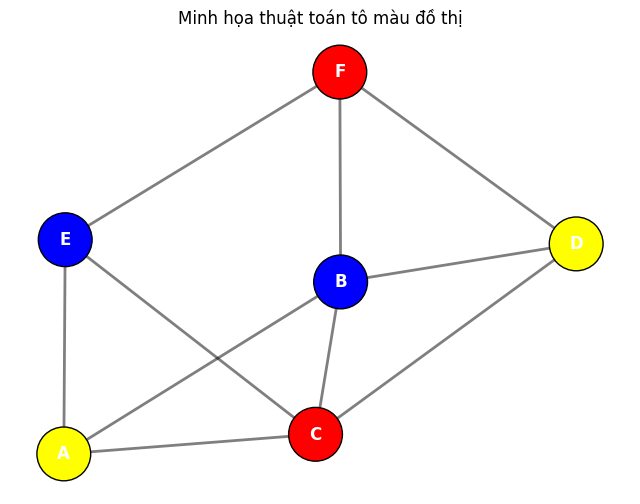

In [10]:
# Bài 1 Vẽ mô hình minh họa..
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Dữ liệu đầu vào và thuật toán của bạn ---
# Ma trận kề 6 đỉnh
G = [[0, 1, 1, 0, 1, 0],
     [1, 0, 1, 1, 0, 1],
     [1, 1, 0, 1, 1, 0],
     [0, 1, 1, 0, 0, 1],
     [1, 0, 1, 0, 0, 1],
     [0, 1, 0, 1, 1, 0]
  ]

node = "ABCDEF"
t_ = {node[i]: i for i in range(len(G))}

# Tính bậc của các đỉnh
degree = [sum(row) for row in G]

# Khởi tạo danh sách màu khả dụng cho mỗi đỉnh
colorDict = {n: ["Blue", "Red", "Yellow", "Green"] for n in node}

# Sắp xếp các đỉnh theo bậc giảm dần (Selection Sort logic)
sortedNode = []
indeks = []
for _ in range(len(degree)):
    _max = -1
    idx = -1
    for j in range(len(degree)):
        if j not in indeks:
            if degree[j] > _max:
                _max = degree[j]
                idx = j
    if idx != -1:
        indeks.append(idx)
        sortedNode.append(node[idx])

# Tô màu (Greedy Coloring)
theSolution = {}
for n in sortedNode:
    setTheColor = colorDict[n]
    if setTheColor:
        theSolution[n] = setTheColor[0] # Chọn màu đầu tiên khả dụng

        # Loại bỏ màu này khỏi danh sách chọn của các đỉnh kề
        adjacent_indices = [i for i, x in enumerate(G[t_[n]]) if x == 1]
        for neighbor_idx in adjacent_indices:
            neighbor_node = node[neighbor_idx]
            if theSolution[n] in colorDict[neighbor_node]:
                colorDict[neighbor_node].remove(theSolution[n])

# In kết quả dạng văn bản
print("Kết quả phân phối màu:")
for t, w in sorted(theSolution.items()):
    print(f"Đỉnh {t}: {w}")

# --- 2. Vẽ đồ thị minh họa ---
# Tạo đồ thị NetworkX
G_vis = nx.Graph()

# Thêm đỉnh và cạnh từ ma trận kề
for i in range(len(node)):
  G_vis.add_node(node[i])
  for j in range(i + 1, len(node)):
    if G[i][j] == 1:
      G_vis.add_edge(node[i], node[j])

# Lấy danh sách màu theo đúng thứ tự các node trong đồ thị để vẽ
# (Lưu ý: NetworkX có thể lưu trữ node không theo thứ tự ABC, nên cần ánh xạ chính xác)
colors_mapped = [theSolution[n] for n in G_vis.nodes()]

# Thiết lập vẽ
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_vis, seed=42) # Layout force-directed để các đỉnh dàn đều

# Vẽ nodes
nx.draw_networkx_nodes(G_vis, pos, node_color=colors_mapped, node_size=1500, edgecolors='black')
# Vẽ labels (tên đỉnh)
nx.draw_networkx_labels(G_vis, pos, font_color='white', font_weight='bold')
# Vẽ cạnh
nx.draw_networkx_edges(G_vis, pos, width=2, alpha=0.5)

plt.title("Minh họa thuật toán tô màu đồ thị")
plt.axis('off') # Tắt trục tọa độ
plt.show()

In [11]:
# Bài tập về nhà
import random

# --- CẤU HÌNH DỮ LIỆU GIẢ LẬP ---
TEACHERS = ['Thầy Hùng (Toán)', 'Cô Lan (Toán)', 'Thầy Minh (Tin)']
CLASSES = ['10A', '10B', '11A']
SUBJECTS = ['Toán', 'Tin']
TIME_SLOTS = range(10) # 10 tiết (Slot 0-9)

# Định nghĩa khối lượng giảng dạy: (Lớp, Môn, Giáo viên, Số tiết)
# Ví dụ: 10A học 3 tiết Toán với Thầy Hùng, 2 tiết Tin với Thầy Minh
curriculum = [
    ('10A', 'Toán', 'Thầy Hùng', 3),
    ('10A', 'Tin',  'Thầy Minh', 2),
    ('10B', 'Toán', 'Cô Lan',    3),
    ('10B', 'Tin',  'Thầy Minh', 2),
    ('11A', 'Toán', 'Thầy Hùng', 3),
    ('11A', 'Tin',  'Thầy Minh', 2)
]

# Tạo danh sách các "Task" (Công việc cần xếp lịch)
# Mỗi task là một tiết học cụ thể
tasks = []
task_id = 0
for lop, mon, gv, so_tiet in curriculum:
    for _ in range(so_tiet):
        # Mỗi phần tử: [id, Lớp, Môn, GV]
        tasks.append({'id': task_id, 'class': lop, 'subject': mon, 'teacher': gv})
        task_id += 1

# --- GIẢI THUẬT DI TRUYỀN ---

POPULATION_SIZE = 50   # Kích thước quần thể
GENERATIONS = 1000     # Số thế hệ tối đa
MUTATION_RATE = 0.1    # Tỷ lệ đột biến

def create_chromosome():
    """Tạo một lịch ngẫu nhiên (Nhiễm sắc thể).
    Mỗi gene là một khung giờ (slot) được gán cho một task."""
    schedule = {}
    for task in tasks:
        schedule[task['id']] = random.choice(TIME_SLOTS)
    return schedule

def calculate_conflicts(schedule):
  """Tính số lượng xung đột trong lịch."""
  conflicts = 0

  # Duyệt qua tất cả các cặp task để kiểm tra va chạm
  for i in range(len(tasks)):
      for j in range(i + 1, len(tasks)):
          t1 = tasks[i]
          t2 = tasks[j]
          slot1 = schedule[t1['id']]
          slot2 = schedule[t2['id']]

          # Nếu 2 task cùng một giờ (cùng màu)
          if slot1 == slot2:
              # Xung đột giáo viên: 1 GV dạy 2 lớp cùng lúc
              if t1['teacher'] == t2['teacher']:
                  conflicts += 1
              # Xung đột lớp học: 1 Lớp học 2 môn cùng lúc
              if t1['class'] == t2['class']:
                  conflicts += 1
  return conflicts

def fitness(schedule):
    """Hàm thích nghi: Xung đột càng ít điểm càng cao."""
    conflicts = calculate_conflicts(schedule)
    return 1 / (conflicts + 1) # +1 để tránh chia cho 0

def crossover(parent1, parent2):
  """Lai ghép 1 điểm cắt."""
  child = {}
  cutoff = random.randint(0, len(tasks) - 1)

  for i, task in enumerate(tasks):
      tid = task['id']
      if i < cutoff:
          child[tid] = parent1[tid]
      else:
          child[tid] = parent2[tid]
  return child

def mutate(schedule):
  """Đột biến: Đổi giờ học của một task ngẫu nhiên."""
  if random.random() < MUTATION_RATE:
      tid = random.choice(tasks)['id']
      schedule[tid] = random.choice(TIME_SLOTS)
  return schedule

# --- CHẠY GIẢI THUẬT ---

# 1. Khởi tạo quần thể ban đầu
population = [create_chromosome() for _ in range(POPULATION_SIZE)]

print(f"Đang xếp lịch cho {len(tasks)} tiết học...")
best_schedule = None

for generation in range(GENERATIONS):
  # Sắp xếp quần thể theo độ thích nghi giảm dần
  population = sorted(population, key=lambda x: fitness(x), reverse=True)

  current_best = population[0]
  current_conflicts = calculate_conflicts(current_best)

  if generation % 100 == 0:
      print(f"Thế hệ {generation}: Số xung đột thấp nhất = {current_conflicts}")

  # Nếu tìm thấy lịch không có xung đột thì dừng ngay
  if current_conflicts == 0:
      best_schedule = current_best
      print(f"--> Đã tìm thấy lịch tối ưu tại thế hệ {generation}!")
      break

  # Tạo thế hệ mới
  next_generation = population[:2] # Giữ lại 2 cá thể tốt nhất (Elitism)

  while len(next_generation) < POPULATION_SIZE:
      # Chọn lọc cha mẹ (Tournament selection đơn giản hoặc lấy top đầu)
      parent1 = random.choice(population[:10])
      parent2 = random.choice(population[:10])

      # Lai ghép
      child = crossover(parent1, parent2)

      # Đột biến
      child = mutate(child)

      next_generation.append(child)

  population = next_generation

if best_schedule is None:
    best_schedule = population[0]
    print("Đã hết số thế hệ. Lấy kết quả tốt nhất hiện tại.")

# --- IN KẾT QUẢ ---
print("\n=== THỜI KHÓA BIỂU ĐỀ XUẤT ===")
# Sắp xếp theo Slot -> Lớp để dễ nhìn
sorted_tasks = sorted(tasks, key=lambda x: (best_schedule[x['id']], x['class']))

print(f"{'Tiết':<10} | {'Lớp':<10} | {'Môn':<10} | {'Giáo viên'}")
print("-" * 50)
for t in sorted_tasks:
    slot = best_schedule[t['id']]
    print(f"Slot {slot:<5} | {t['class']:<10} | {t['subject']:<10} | {t['teacher']}")

Đang xếp lịch cho 15 tiết học...
Thế hệ 0: Số xung đột thấp nhất = 2
--> Đã tìm thấy lịch tối ưu tại thế hệ 1!

=== THỜI KHÓA BIỂU ĐỀ XUẤT ===
Tiết       | Lớp        | Môn        | Giáo viên
--------------------------------------------------
Slot 0     | 10A        | Toán       | Thầy Hùng
Slot 0     | 10B        | Toán       | Cô Lan
Slot 0     | 11A        | Tin        | Thầy Minh
Slot 1     | 10A        | Toán       | Thầy Hùng
Slot 2     | 11A        | Tin        | Thầy Minh
Slot 3     | 10B        | Tin        | Thầy Minh
Slot 3     | 11A        | Toán       | Thầy Hùng
Slot 5     | 10A        | Toán       | Thầy Hùng
Slot 6     | 10A        | Tin        | Thầy Minh
Slot 6     | 10B        | Toán       | Cô Lan
Slot 6     | 11A        | Toán       | Thầy Hùng
Slot 7     | 10A        | Tin        | Thầy Minh
Slot 7     | 10B        | Toán       | Cô Lan
Slot 8     | 10B        | Tin        | Thầy Minh
Slot 9     | 11A        | Toán       | Thầy Hùng
